# Semi-Project 그게뭐약💊

## 0. 필요한 패키지 설치

In [1]:
## library  as tf
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np
import os
import re
from PIL import Image
import shutil
import xml.etree.ElementTree as et
import random
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.gridspec as gridspec

## library as pytorch
import cv2
import torch
from torch.utils.data import Dataset


## library import
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

import tensorflow.keras as keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import * 
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix, roc_curve
import seaborn as sns


import numpy as np
import pandas as pd
import os
import re
from PIL import Image
import shutil
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt

print(tf.__version__)
print(keras.__version__)

2.8.2
2.8.0


In [2]:
# # 구글 colab 한글 폰트 설치
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [3]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [4]:
# 오류 무시
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# 자연상수 e 없이 나오게
# pd.options.display.float_format = '{:,f}'.format
pd.options.display.float_format = '{:,.3f}'.format  # 소숫점 3자리

pd.set_option('display.max_rows', None)  # 모든 행 보이기
# pd.set_option('display.max_rows', 60)  # 일부 행만 보이기, default : 60

pd.set_option('display.max_columns', None)  # 모든 열 보이기
# pd.set_option('display.max_columns', 20)  # 일부 열만 보이기, default : 20
# matplotlib 한글 폰트 오류 문제 해결
# from matplotlib import rc
# plt.rc('font', family='Malgun Gothic')

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

텐서플로우 버전 gpu

In [5]:
import tensorflow as tf

print(tf.__version__)

tf.test.is_gpu_available(
    cuda_only=False,
    min_cuda_compute_capability=None
)
# True

2.8.2
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

파이토치 gpu

시드값 고정

In [6]:
# # 시드값 고정
# seed = 42
# os.environ('PYTHONHASHSEED') = str(seed)
# random.seed(seed)    # 파이썬 난수 생성기 시드 고정
# np.random.seed(seed)   # 넘파이 난수 생성기 시드 고정
# torch.manual_seed(seed)   # 파이토치 난수 생성기 시드 고정 (CPU 사용시)
# torch.cuda.manual_seed(seed)   # 파이토치 난수 생성기 시드 고정 (GPU 사용 시)
# torch.cuda.manual_seed_all(seed)   # 파이토치 난수 생성기 시드 고정 (멀티GPU 사용 시)
# torch.backends.cudnn.deterministic = True  # 확정적 연산 사용
# torch.backends.cudnn.benchmark = False   # 벤치마크 기능 해제
# torch.backends.cudnn.enabled = False  # cudnn 사용 해제

In [7]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

# cuda : 병렬 처리 플랫폼
# cuda에서 GPU를 사용할 수 있다면 장비를 'cuda'로, 그렇지 않다면 'cpu'

## 1.데이터 둘러보기

In [8]:
# 파일 경로 지정
data_dir = '/content/drive/MyDrive/mulcam_semi'
file_path = os.path.join(data_dir, 'pill_information.csv')
print(file_path)
image_dir1 = os.path.join(data_dir, 'alyac1.zip')
image_dir2 = os.path.join(data_dir, 'alyac2.zip')
print(image_dir1)
print(image_dir2)

/content/drive/MyDrive/mulcam_semi/pill_information.csv
/content/drive/MyDrive/mulcam_semi/alyac1.zip
/content/drive/MyDrive/mulcam_semi/alyac2.zip


In [9]:
# # zip 파일 풀기
# !unzip -qq '/content/drive/MyDrive/mulcam_semi/alyac1.zip' -d '/content/image'

replace /content/image/0.가스디알정50밀리그램(디메크로틴산마그네슘).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [10]:
# !unzip -qq '/content/drive/MyDrive/mulcam_semi/alyac2.zip' -d '/content/image'

replace /content/image/10002.토랜트캡슐.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [11]:
# import zipfile
# with zipfile.ZipFile(image_dir, 'r') as existing_zip:
#     existing_zip.extractall('/content/image')

In [52]:
# 이미지 경로 설정
image_dir = '/content/image'
print(image_dir)

/content/image


In [53]:
# data_dir에 있는 이미지 파일 리스트
image_list = os.listdir(image_dir)
print(image_list)

['309.이탄탄큐캡슐(수출용).jpg', '11168.캐치콜에스연질캡슐.jpg', '9152.프로세프정(세프프로질수화물).jpg', '22883.바이오탑하이듀얼캡슐.jpg', '16647.유니그릴씨알정(사르포그렐레이트염산염).jpg', '22303.뉴스타틴듀오캡슐.jpg', '15372.프라코프에스연질캡슐.jpg', '23362.목시클렌정375밀리그램(아목시실린-클라불란산칼륨).jpg', '19351.트라몰8시간서방정650밀리그람(아세트아미노펜).jpg', '7429.아마릴엠정1_250밀리그람(수출명_코아마릴1_250밀리그람).jpg', '9567.메가헬스연질캡슐.jpg', '16356.쏙코프에스연질캡슐.jpg', '6729.레보세티정(레보세티리진염산염).jpg', '9932.삼성덱스펜연질캡슐(덱시부프로펜).jpg', '8986.이천타제정.jpg', '9249.코큐비타정.jpg', '15752.패북소정80밀리그램(페북소스타트).jpg', '20289.로수엠젯정10_10밀리그램.jpg', '19179.라이트록소정(록소프로펜나트륨수화물).jpg', '9198.레디페린-에프캡슐.jpg', '6793.트리마펜정.jpg', '10.발사르텔정80밀리그램(발사르탄).jpg', '7857.휴로펜정(록소프로펜나트륨수화물).jpg', '21292.미니레신정0.2mg(데스모프레신아세트산염).jpg', '6873.코판토정.jpg', '888.이르베탄정150밀리그램(이베사탄).jpg', '6177.유로알파엑스엘정(알푸조신염산염).jpg', '21431.몬텔루정10밀리그램(몬테루카스트나트륨).jpg', '7595.클로펜정(아세클로페낙).jpg', '2748.동화락테올정(락토바실루스아시도필루스균틴달화립).jpg', '18287.뉴카르벨로정12.5밀리그램(카르베딜롤).jpg', '17930.베포큐서방정(베포타스틴살리실산염).jpg', '7042.유트렌세미정.jpg', '3900.신일티아민염산염정10밀리그램.jpg', '1843.명문클로피도그렐정(클로피도그렐황산수소염).jpg', '148

In [54]:
## image file 수 확인
allimage = [f for f in image_list]
print(len(allimage))

24675


In [55]:
allimage[:5]

['309.이탄탄큐캡슐(수출용).jpg',
 '11168.캐치콜에스연질캡슐.jpg',
 '9152.프로세프정(세프프로질수화물).jpg',
 '22883.바이오탑하이듀얼캡슐.jpg',
 '16647.유니그릴씨알정(사르포그렐레이트염산염).jpg']

In [56]:
#class수 확인: 중복을 허용하지 않는 set을 사용
classlist = set()
list_not = []

for image in allimage:
    # classname = re.split('[., _, (,)]',image)[1]
    classname = ' '.join(re.split('[.]', image)[1:-1])
    if classname not in classlist:  # 처음 등장한 원소
        classlist.add(classname)
    else:
        if classname not in list_not:
            list_not.append(classname) # 중복 원소
print(len(classlist))
print(len(list_not))
print(list_not)

24626
42
['토파맥스정100밀리그램(토피라메이트)', '엑스페라정10_160밀리그램', '파세몰비타정', '레날리드정(레날리도마이드)', '마르나에프정(방풍통성산건조엑스(4 6→1))', '징키스틴캡슐(히스티딘아연이수화물)', '라믹탈정25밀리그램_50밀리그램_100밀리그램(라모트리진)', '젠스트린트로키(멘톨앤페퍼민트향_페퍼민트향_레몬향_복숭아향)(플루르비프로펜)', '저니스타서방정4밀리그램(히드로모르폰염산염)', '바이타맥스골드정', '씨티리진정(레보세티리진염산염)', '리스펜오디정1밀리그램(리스페리돈)', '인베가서방정3밀리그램(팔리페리돈)', '리스펜오디정2밀리그램(리스페리돈)', '모아코프연질캡슐', '유빅스정(클로피도그렐황산수소염)', '이무테라정(아자티오프린)', '펜타우드연질캡슐(덱시부프로펜)', '속이쿨정', '옵티콜드연질캡슐', '아미펜정', '티에스원캡슐20_25', '토파맥스스프링클캡슐25밀리그램(토피라메이트)', '핀테정(에포니디핀염산염)', '듀오레캡슐', '콘서타OROS서방정18밀리그램(메틸페니데이트염산염)', '콘서타OROS서방정27밀리그램(메틸페니데이트염산염)', '씨프로바이정250밀리그램(시프로플록사신염산염수화물)', '렉스프람정10밀리그램(에스시탈로프람옥살산염)', '팜비어정750밀리그램(팜시클로비르)', '토파맥스정25밀리그램(토피라메이트)', '인베가서방정9밀리그램(팔리페리돈)', '부스론정5밀리그램_10밀리그램(부스피론염산염)', '토파맥스스프링클캡슐50밀리그램(토피라메이트)', '옵티노즈연질캡슐', '라피드정(레바미피드)', '로나센정2밀리그램(블로난세린)_로나센정4밀리그램(블로난세린)', '치옥타시드에이취알정200_600밀리그램(티옥트산)', '옵티코프연질캡슐', '인베가서방정6밀리그램(팔리페리돈)', '미놀에프트로키(페퍼민트맛_오렌지맛_모과맛)', '신일겔정']


201507425 젠스트린트로키(멘톨앤페퍼민트향, 페퍼민트향, 레몬향, 복숭아향)(플루르비프로펜)

201507425 젠스트린트로키(멘톨앤페퍼민트향, 페퍼민트향, 레몬향, 복숭아향)(플루르비프로펜)

200906540 2

200209641 3

200401818 2

200202793 2

200201478 2

200300393 2

201706587 7

201507425 3

201109733 2
품목일련번호, 개수

classlist : 중복 제거된 set

In [57]:
re.split('[.]', allimage[4454])

['882', '이베라플러스정150_12', '5밀리그램', 'jpg']

In [58]:
re.split('[.]', allimage[4454])[1:-1]

['이베라플러스정150_12', '5밀리그램']

In [59]:
' '.join(re.split('[.]', allimage[4454])[1:-1])

'이베라플러스정150_12 5밀리그램'

In [60]:
' '.join(allimage[4454].split('.')[1:-1])

'이베라플러스정150_12 5밀리그램'

In [61]:
# # classlist.sort()
classlist_sort = sorted(sorted(classlist), key=lambda c:0 if re.search('[ㄱ-힣]', c) else 1)
classlist_sort

['가나릴정(이토프리드염산염)',
 '가나메드정(이토프리드염산염)',
 '가나모티에스알정15밀리그램(모사프리드시트르산염수화물)',
 '가나모티정(모사프리드시트르산염수화물)',
 '가나슨캡슐',
 '가나칸정50밀리그램(이토프리드염산염)',
 '가나텍정(이토프리드염산염)',
 '가나톤정50밀리그램(이토프리드염산염)',
 '가나티란정(모사프리드시트르산염수화물)',
 '가나폴로연질캡슐(수출명_Hexamine)',
 '가나프리드정(이토프리드염산염)',
 '가나플럭스정20_1100밀리그램',
 '가나플럭스정40_1100밀리그램',
 '가네리버연질캡슐175mg(밀크시슬열매건조엑스)',
 '가네리버연질캡슐350mg(밀크시슬열매건조엑스)',
 '가네맥스연질캡슐(밀크시슬열매건조엑스)',
 '가네조아350연질캡슐(밀크시슬열매건조엑스)',
 '가네존연질캡슐(밀크시슬열매건조엑스)',
 '가네진정',
 '가네카정',
 '가네쿨연질캡슐',
 '가네탑골드연질캡슐',
 '가네탑플러스연질캡슐350밀리그램(밀크시슬열매건조엑스)',
 '가니토정(이토프리드염산염)',
 '가두에정5_10밀리그램',
 '가두에정5_20밀리그램',
 '가드렛정100mg(아나글립틴)',
 '가드메트정100_1000밀리그램',
 '가드메트정100_500밀리그램',
 '가드메트정100_850밀리그램',
 '가드본정',
 '가디엔정1000밀리그램(에카베트나트륨수화물)(수출용)',
 '가딘정(라니티딘염산염)(수출명_클라니딘정)',
 '가딘정75밀리그램(라니티딘염산염)',
 '가레오연질캡슐(디히드록시디부틸에테르)',
 '가레오연질캡슐500밀리그램(디히드록시디부틸에테르)',
 '가로틴캡슐100밀리그램(가바펜틴)',
 '가르딘정20밀리그람(파모티딘)',
 "가르젠정'세라티오펩티다제'",
 '가르젠정10밀리그람(세라티오펩티다제)(수출명_RYDAS)',
 '가모드서방정15밀리그램(모사프리드시트르산염수화물)',
 '가모드정(모사프리드시트르산염수화물)',
 '가모사드정(모사프리드시트르산염수화물)',
 '가모시드정5밀리그램(모사프리드시트르산

In [62]:
# classlist를 sort 정렬한 것에 index붙임
class2idx = {cls:idx for idx, cls in enumerate(classlist_sort)}
class2idx

{'가나릴정(이토프리드염산염)': 0,
 '가나메드정(이토프리드염산염)': 1,
 '가나모티에스알정15밀리그램(모사프리드시트르산염수화물)': 2,
 '가나모티정(모사프리드시트르산염수화물)': 3,
 '가나슨캡슐': 4,
 '가나칸정50밀리그램(이토프리드염산염)': 5,
 '가나텍정(이토프리드염산염)': 6,
 '가나톤정50밀리그램(이토프리드염산염)': 7,
 '가나티란정(모사프리드시트르산염수화물)': 8,
 '가나폴로연질캡슐(수출명_Hexamine)': 9,
 '가나프리드정(이토프리드염산염)': 10,
 '가나플럭스정20_1100밀리그램': 11,
 '가나플럭스정40_1100밀리그램': 12,
 '가네리버연질캡슐175mg(밀크시슬열매건조엑스)': 13,
 '가네리버연질캡슐350mg(밀크시슬열매건조엑스)': 14,
 '가네맥스연질캡슐(밀크시슬열매건조엑스)': 15,
 '가네조아350연질캡슐(밀크시슬열매건조엑스)': 16,
 '가네존연질캡슐(밀크시슬열매건조엑스)': 17,
 '가네진정': 18,
 '가네카정': 19,
 '가네쿨연질캡슐': 20,
 '가네탑골드연질캡슐': 21,
 '가네탑플러스연질캡슐350밀리그램(밀크시슬열매건조엑스)': 22,
 '가니토정(이토프리드염산염)': 23,
 '가두에정5_10밀리그램': 24,
 '가두에정5_20밀리그램': 25,
 '가드렛정100mg(아나글립틴)': 26,
 '가드메트정100_1000밀리그램': 27,
 '가드메트정100_500밀리그램': 28,
 '가드메트정100_850밀리그램': 29,
 '가드본정': 30,
 '가디엔정1000밀리그램(에카베트나트륨수화물)(수출용)': 31,
 '가딘정(라니티딘염산염)(수출명_클라니딘정)': 32,
 '가딘정75밀리그램(라니티딘염산염)': 33,
 '가레오연질캡슐(디히드록시디부틸에테르)': 34,
 '가레오연질캡슐500밀리그램(디히드록시디부틸에테르)': 35,
 '가로틴캡슐100밀리그램(가바펜틴)': 36,
 '가르딘정20밀리그람(파모티딘)': 37,
 "가르젠정'세라티오펩티다제'

In [63]:
len(class2idx)

24626

In [64]:
class2idx['올메텍정40밀리그램(올메사르탄메독소밀)']

15843

## 2. EDA

In [65]:
df = pd.read_csv(file_path)

In [66]:
df.head(2)

,품목일련번호,품목명,업소일련번호,업소명,성상,큰제품이미지,표시앞,표시뒤,의약품제형,색상앞,색상뒤,분할선앞,분할선뒤,크기장축,크기단축,크기두께,이미지생성일자(약학정보원),분류번호,분류명,전문일반구분,품목허가일자,제형코드명,표기내용앞,표기내용뒤,표기이미지앞,표기이미지뒤,표기코드앞,표기코드뒤,변경일자,Unnamed: 29
0,200808876,가스디알정50밀리그램(디메크로틴산마그네슘),19540006,일동제약(주),녹색의원형필름코팅정,https://nedrug.mfds.go.kr/pbp/cmn/itemImageDow...,IDG,-,원형,연두,-,-,-,7.6,7.6,3.6,20100326,02390,기타의소화기관용약,전문의약품,20080820,당의정,-,-,-,-,-,-,-,NaN
1,200808877,페라트라정2.5밀리그램(레트로졸),19560004,(주)유한양행,어두운황색의원형필름코팅정,https://nedrug.mfds.go.kr/pbp/cmn/itemImageDow...,YH,LT,원형,노랑,-,-,-,6.1,6.1,3.5,20100429,04210,항악성종양제,전문의약품,20080820,필름코팅정,-,-,-,-,-,-,-,NaN


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24675 entries, 0 to 24674
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   품목일련번호          24675 non-null  int64  
 1   품목명             24675 non-null  object 
 2   업소일련번호          24675 non-null  int64  
 3   업소명             24675 non-null  object 
 4   성상              24675 non-null  object 
 5   큰제품이미지          24675 non-null  object 
 6   표시앞             24674 non-null  object 
 7   표시뒤             24673 non-null  object 
 8   의약품제형           24675 non-null  object 
 9   색상앞             24675 non-null  object 
 10  색상뒤             24675 non-null  object 
 11  분할선앞            24675 non-null  object 
 12  분할선뒤            24675 non-null  object 
 13  크기장축            24675 non-null  object 
 14  크기단축            24675 non-null  object 
 15  크기두께            24675 non-null  object 
 16  이미지생성일자(약학정보원)  24675 non-null  int64  
 17  분류번호            24675 non-null 

In [68]:
df_small = df.loc[:, ['품목일련번호','성상', '표시앞', '표시뒤', '의약품제형', '색상앞', '색상뒤','제형코드명']]

의약품제형 단일화

In [69]:
unique = df_small['의약품제형'].unique()
print(f'의약품제형 고윳값 : {unique}')

의약품제형 고윳값 : ['원형' '장방형' '타원형' '팔각형' '오각형' '삼각형' '기타' '마름모형' '사각형' '육각형' '반원형']


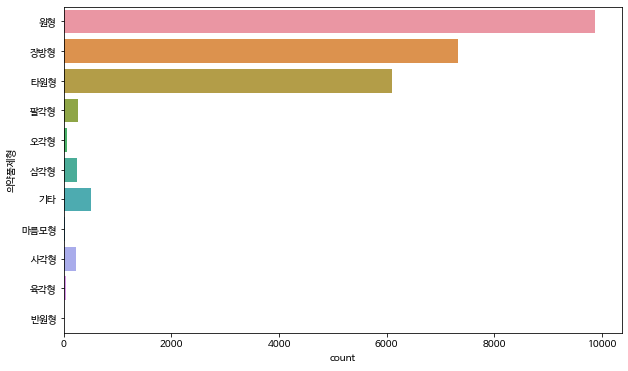

In [70]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(data=df_small, y='의약품제형')
plt.show()

In [102]:
len(df_small[df_small['의약품제형'] == '사각형'])

221

In [103]:
len(df_small[df_small['의약품제형'] == '팔각형'])

263

In [104]:
len(df_small[df_small['의약품제형'] == '삼각형'])

243

In [94]:
df_small_tmp = df_small.copy()

오각형, 마름모형, 육각형, 반원형 >> 기타로 분류

In [105]:
def make_etc(x):
    if len(df_small[df_small['의약품제형']==x]) >= 200:
        return x
    else:
        return '기타'

df_small_tmp['의약품제형'] = df_small_tmp['의약품제형'].apply(make_etc)

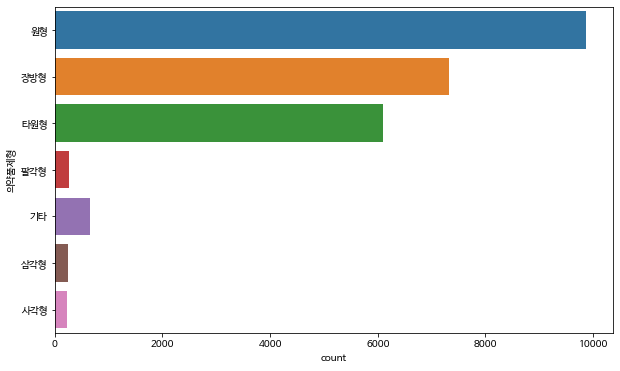

In [106]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(data=df_small_tmp, y='의약품제형')
plt.show()

색상 단일화

In [108]:
unique = df_small['색상앞'].unique()
print(f'(앞)색상 고윳값 : {unique}')

(앞)색상 고윳값 : ['연두' '노랑' '하양' '분홍' '주황' '초록' '갈색' '주황|투명' '투명' '검정' '파랑' '자주' '빨강' '회색'
 '청록|투명' '파랑|투명' '하양|빨강' '초록|투명' '분홍|투명' '보라|투명' '하양|파랑' '노랑|투명' '파랑|옅은'
 '청록' '보라' '빨강|투명' '갈색|투명' '갈색|진한' '남색' '하양|투명' '남색|투명' '하양|초록' '하양|갈색'
 '하양|주황|투명' '하양|노랑' '분홍|진한' '분홍|옅은' '자주|투명' '검정|투명' '연두|투명']


In [72]:
unique = df_small['색상뒤'].unique()
print(f'(뒤)색상 고윳값 : {unique}')

(뒤)색상 고윳값 : ['-' '하양' '주황|투명' '초록' '노랑' '빨강' '파랑' '주황' '갈색' '노랑|옅은' '파랑|진한' '연두' '자주'
 '투명' '회색' '분홍' '남색' '초록|투명' '청록' '보라' '하양|투명' '갈색|옅은' '노랑|투명' '분홍|투명'
 '갈색|진한' '초록|옅은' '파랑|옅은' '회색|진한' '하양|초록|투명' '연두|진한' '자주|진한' '검정' '청록|옅은'
 '노랑|진한' '주황|옅은' '갈색|투명' '분홍|옅은' '초록|진한' '자주|옅은' '검정|투명' '연두|옅은' '청록|투명'
 '하양|파랑' '하양|노랑']


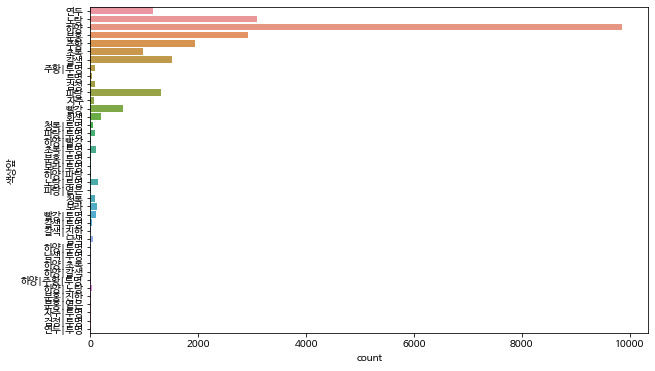

In [73]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df_small, y='색상앞')
plt.show()

In [123]:
df_small.iloc[39]['색상앞']

'주황|투명'

In [121]:
df_small.iloc[39]['색상앞'].split('|')[0]

'주황'

In [131]:
df_small_tmp['색상앞'] = df_small_tmp['색상앞'].apply(lambda x : x.split('|')[0])

In [132]:
unique2 = df_small_tmp['색상앞'].unique()
print(f'(앞)색상 고윳값 : {unique2}')

(앞)색상 고윳값 : ['연두' '노랑' '하양' '분홍' '주황' '초록' '갈색' '투명' '검정' '파랑' '자주' '빨강' '회색' '청록'
 '보라' '남색']


In [133]:
df_small_tmp['색상뒤'] = df_small_tmp['색상뒤'].apply(lambda x : x.split('|')[0])

In [134]:
unique2 = df_small_tmp['색상뒤'].unique()
print(f'(앞)색상 색상뒤 : {unique2}')

(앞)색상 색상뒤 : ['-' '하양' '주황' '초록' '노랑' '빨강' '파랑' '갈색' '연두' '자주' '투명' '회색' '분홍' '남색' '청록'
 '보라' '검정']


In [135]:
pd.crosstab(df_small_tmp['의약품제형'], df_small_tmp['색상앞'])

색상앞,갈색,검정,남색,노랑,보라,분홍,빨강,연두,자주,주황,청록,초록,투명,파랑,하양,회색
의약품제형,,,,,,,,,,,,,,,,
기타,3,0,0,89,4,56,1,23,0,17,20,89,0,137,213,2
사각형,5,0,0,57,0,79,2,2,0,36,1,1,0,13,24,1
삼각형,10,0,0,71,0,53,1,24,0,12,0,2,0,5,61,4
원형,174,7,1,1288,13,1545,129,312,10,708,17,143,0,237,5255,33
장방형,781,28,42,997,95,320,357,526,37,609,41,613,24,674,2080,94
타원형,557,47,1,738,29,803,213,285,20,629,40,221,1,338,2115,67
팔각형,1,0,0,4,0,83,0,1,0,4,0,0,0,0,170,0


In [136]:
pd.crosstab(df_small_tmp['색상앞'], df_small_tmp['색상뒤'])

색상뒤,-,갈색,검정,남색,노랑,보라,분홍,빨강,연두,자주,주황,청록,초록,투명,파랑,하양,회색
색상앞,,,,,,,,,,,,,,,,,
갈색,1179,125,0,0,36,1,28,7,1,1,10,1,6,6,0,126,4
검정,69,1,2,0,2,0,0,5,1,0,1,0,0,0,0,1,0
남색,3,0,0,4,0,0,0,0,3,0,0,0,0,1,1,32,0
노랑,2729,2,0,0,377,0,0,0,1,0,5,0,1,4,1,78,46
보라,52,0,0,0,2,7,0,0,0,0,0,0,0,1,0,76,3
분홍,2836,0,0,0,0,0,71,1,0,1,2,0,1,0,0,26,1
빨강,440,5,0,0,70,2,22,87,0,0,3,0,0,7,2,62,3
연두,957,0,0,0,75,0,0,1,105,0,0,0,5,0,0,30,0
자주,37,0,0,0,10,0,4,0,0,14,0,0,0,0,0,2,0


In [138]:
unique = df['전문일반구분'].unique()
print(f'전문일반구분 고윳값 : {unique}')

전문일반구분 고윳값 : ['전문의약품' '일반의약품' '전문|희귀' '일반(안전상비)']


In [139]:
unique = df_small_tmp['성상'].unique()
print(f'성상 고윳값 : {unique}')

성상 고윳값 : ['녹색의원형필름코팅정' '어두운황색의원형필름코팅정' '흰색의원형구강붕해정제' ...
 '노란색을띠는흰색~미백색의가루가든상부밝은빨간색|하부흰색의불투명경질캡슐제'
 '노란색을띠는흰색~미백색의가루가든상부상아색|하부흰색의불투명경질캡슐제' '흰색내지밝은회색의분말을함유한상|하부연한노랑색의경질캡슐제']


In [140]:
unique = df_small_tmp['제형코드명'].unique()
print(f'제형코드명 고윳값 : {unique}')

제형코드명 고윳값 : ['당의정' '필름코팅정' '정제' '나정' '스팬슐' '-' '연질캡슐제|현탁상' '추어블정(저작정)' '젤라틴코팅성경질캡슐제'
 '경질캡슐제|산제' '연질캡슐제|액상' '정제|미분류' '캡슐|미분류' '서방성캡슐제|펠렛' '경질캡슐제|과립제' '다층정'
 '구강붕해정' '장용성필름코팅정' '서방성필름코팅정' '장용정' '트로키제' '서방성장용필름코팅정' '서방정'
 '경질캡슐제|장용성과립제' '장용성캡슐제|정제' '흡입제|미분류' '장용성캡슐제|펠렛' '분산정(현탁정)' '설하정'
 '경질캡슐제|과립제정제' '경질캡슐제|서방성장용성펠렛' '구강붕해필름' '캡슐' '장용성당의정' '질정' '질연질캡슐제'
 '장용성필름코팅당의정' '경질캡슐제|정제' '장용성필름코팅캡슐제' '질좌제|일반' '껌제' '서방성다층정' '발포정' '산제'
 '지지체가있는첩부제' '정량흡입제|분말제' '박칼정' '정량분말분무제' '부착정' '유핵정']


In [78]:
unique = df['분류명'].unique()
print(f'분류명 고윳값 : {unique}')

분류명 고윳값 : ['기타의소화기관용약' '항악성종양제' '최면진정제' '혈압강하제' '동맥경화용제' '해열.진통.소염제' '정신신경용제'
 '기타의중추신경용약' '기타의비뇨생식기관및항문용약' '당뇨병용제' '치과구강용약' '기타의순환계용약' '간장질환용제'
 '혼합비타민제(비타민AD혼합제제를제외)' '진해거담제' '소화성궤양용제' '칼슘제' '기타의비타민제' '기타의화학요법제'
 '무기질제제' '기타의자양강장변질제' '하제|완장제' '골격근이완제' '따로분류되지않는대사성의약품' '진경제' '항전간제'
 '제산제' '주로그람양성|음성균에작용하는것' '주로그람양성균|리케치아|비루스에작용하는것' '비타민C및P제' '단백아미노산제제'
 '항히스타민제' '종합대사성제제' '구충제' '혈관확장제' '기타의외피용약' '정장제' '비타민E및K제' '기타의알레르기용약'
 '자격요법제(비특이성면역억제제를포함)' '난포호르몬제및황체호르몬제' '효소제제' '기타의호흡기관용약' '안과용제' '합성마약'
 '통풍치료제' '따로분류되지않고치료를주목적으로하지않는의약품' '부정맥용제' '비타민B제(비타민B1을제외)' '기타의혈액및체액용약'
 '비타민B1제' '건위소화제' '자율신경제' '아편알카로이드계제제' '혈액응고저지제' '진훈제' '피임제' '항원충제'
 '기타의조제용약' '최토제|진토제' '뇌하수체호르몬제' '각성제|흥분제' '해독제' '비타민A및D제' '기타의조직세포의기능용의약품'
 '기타의항생물질제제(복합항생물질제제를포함)' '부신호르몬제' '이비과용제' '강심제' '화농성질환용제'
 '모발용제(발모|탈모|염모|양모제)' '주로그람양성|음성균|리케치아|비루스에작용하는것' '지혈제' '항결핵제'
 '주로항산성균에작용하는것' '이담제' '비뇨생식기관용제(성병예방제포함)' '주로그람음성균에작용하는것' '설화제' '혈관보강제'
 '단백동화스테로이드제' '이뇨제' '치질용제' '주로그람양성균에작용하는것' '치나제' '기타의종양치료제'
 '기타의호르몬제(항호르몬제를포함)' '혈액대용제' 

In [141]:
unique = df_small_tmp['표시앞'].unique()
print(f'표시앞 고윳값 : {unique}')

표시앞 고윳값 : ['IDG' 'YH' '-' ... '마크E20' 'DTTDTT' 'SKDEX']


In [142]:
df_tmp = df_small_tmp['표시앞'] == '-'
df_pyo = df_small[df_tmp]
len(df_pyo)

324

In [143]:
df_pyo.head()

,품목일련번호,성상,표시앞,표시뒤,의약품제형,색상앞,색상뒤,제형코드명
2,200808948,흰색의원형구강붕해정제,-,-,원형,하양,-,정제
361,201002064,흰색의원형구강붕해정,-,-,원형,하양,-,구강붕해정
402,201003096,흰색또는미백색의타원형정제,-,KW80,타원형,하양,-,나정
437,200907976,특이한냄새가나는밝은베이지색분말이들어있고|적갈색코팅이되어있는무색투명한원통형의경질캡슐,-,-,장방형,갈색,갈색,경질캡슐제|산제
491,201000878,흰색/분홍색의두층으로이루어진타원형정제로흰색층에분홍색반점이있을수있다.,-,KW80,타원형,분홍,하양,다층정


In [144]:
df_tmp2 = df_pyo['표시뒤'] == '-'
df_pyo = df_pyo[df_tmp2]
len(df_pyo)

188

In [145]:
df_pyo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188 entries, 2 to 24629
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   품목일련번호  188 non-null    int64 
 1   성상      188 non-null    object
 2   표시앞     188 non-null    object
 3   표시뒤     188 non-null    object
 4   의약품제형   188 non-null    object
 5   색상앞     188 non-null    object
 6   색상뒤     188 non-null    object
 7   제형코드명   188 non-null    object
dtypes: int64(1), object(7)
memory usage: 13.2+ KB


In [147]:
lst = [] #정제
for front, back, typ, shape in zip(df_small_tmp['표시앞'], df_small_tmp['표시뒤'], df_small_tmp['성상'], df_small_tmp['의약품제형']):
    if "정제" in typ:
        lst.append((front, back, typ, shape))
    elif "캡슐" in typ:
        pass
    elif "캅셀제" in typ:
        pass
    elif "정" in typ:
        lst.append((front, back, typ, shape))

In [148]:
lst_no_mark = []
for front, back, typ, shape in lst:
    if front == '-' and back == '-':
        lst_no_mark.append((front, back, shape))
    if front == '마크' and back == '-':
        lst_no_mark.append((front, back, shape))
    if front == '-' and back == '마크':
        lst_no_mark.append((front, back, shape))

In [149]:
len(lst_no_mark)

283

In [150]:
len(lst)

19001

In [151]:
len(df_small)

24675

In [152]:
list(df_small['표시앞'])

['IDG',
 'YH',
 '-',
 'KD',
 'ISP',
 'V분할선T',
 'LPT',
 'SPC',
 'ID·5',
 'AT',
 'V분할선8',
 'V분할선16',
 'DPC',
 'CKD',
 'V분할선A',
 'YH',
 'SJ',
 'KDCNTC8',
 'KD분할선VT',
 'PAC',
 'CKDRSD10',
 'AG',
 '분할선',
 'Y분할선H',
 'Y분할선H',
 '마크분할선C8',
 '마크분할선C16',
 'R분할선Y',
 'BMI',
 'COΛ',
 'BT분할선NF',
 '깅코탄',
 'SILIV',
 'MNM',
 'ETM',
 'ALC',
 'hw19',
 'HF',
 '마크분할선CS',
 'KKMCOZ',
 'BTOCNA',
 'KDGP',
 'IBN',
 'IHP',
 'MM분할선D',
 'Mobic7.5mg',
 'Mobic15mg',
 'RPCQR',
 'VAL',
 'T21',
 'D-WMH',
 'INS',
 'JIΛN',
 'BTOORX',
 'T37',
 '분할선',
 'BPMA',
 'SNPDTC',
 'SC200',
 'BonelaxER15mg',
 'BonelaxER30mg',
 'SCP',
 'SZ',
 'SZ',
 'SZ',
 'SZ',
 'SZ',
 'SZ',
 'SELECT',
 'CGPHP',
 '메펜',
 'RPSTM',
 'KNHQ',
 '제로민',
 '비나코',
 'HanmiLipidown120',
 'DCD',
 'T32',
 'T-32',
 '마이에신마이에신',
 'T23',
 'D-WGT',
 'HS1',
 'NK',
 'SJS',
 '리버플란',
 'ECX',
 'TONEX-F마크',
 'ETXH-L',
 'VITAMINE',
 'NKYUNGDONG',
 'OGT918100',
 'SJDX',
 'GHT',
 'SJED',
 'CORE',
 'T36',
 'SCPOM',
 'GHT',
 'D-WVQ',
 'SCP',
 '552',
 'BTOCN',
 '이젠이이젠이',
 'BMS',
 '

## 이미지 출력

In [50]:
# 이미지 출력
def show_image(img_ids, rows=2, cols=3):
    assert len(img_ids) <= rows*cols   # 이미지가 행/열 개수보다 많으면 오류 발생

    plt.figure(figsize=(15,8))   # 전체 Figure 크기 설정
    grid = gridspec.GridSpec(rows,cols)  # 서브플롯 배치

    # 이미지 출력
    for idx, img_id in enumerate(img_ids):
        img_path = f'/content/image/{img_id}.jpg'  # 이미지 파일 경로
        image = cv2.imread(img_path)   # 이미지 파일 읽기
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)   # 이미지 색상 보정
        ax = plt.subplot(grid[idx])
        ax.imshow(image)  # 이미지 출력

In [51]:
show_image(image_list)

AssertionError: ignored

In [ ]:
# ## train, validation directory 생성
# train_dir = os.path.join('/content/drive/MyDrive/mulcam_semi', 'train')
# val_dir = os.path.join('/content/drive/MyDrive/mulcam_semi', 'validation')
# os.makedirs(train_dir, exist_ok=True)
# os.makedirs(val_dir, exist_ok=True)

In [ ]:
## train, validation directory 생성
train_dir = os.path.join('/content/', 'train')
val_dir = os.path.join('/content/', 'validation')
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

In [ ]:
#한 번 했으면 안해도 되는 TRAIN_TEST_SPLIT
# cnt = {}
# previous_class = ""
# for image_file in image_files:
#     file_name = os.path.splitext(image_file)[0]
# #     print(file_name)
#     class_name = re.split('[/,(,). :, _]',file_name)[-1]
# #     print(class_name)
#     if class_name in cnt:
#         cnt[class_name] += 1
#     else:
#         cnt[class_name] = 1
#     if cnt[class_name] <= 80:
#         cpath = train_dir
#     else:
#         cpath = val_dir
#     image_path = os.path.join(image_dir, image_file)
#     shutil.copy(image_path, cpath)
#     previous_class = class_name

In [ ]:
cnt = {}
previous_class = ""
for image_file in allimage:
    file_name = os.path.splitext(image_file)[0]
#     print(file_name)
    class_name = re.split('[/,(,). :, _]',file_name)[-1]
    # classname = re.split('[., _, (,)]',image)[1]
#     print(class_name)
    if class_name in cnt:
        cnt[class_name] += 1
    else:
        cnt[class_name] = 1
    if cnt[class_name] <= 80:
        cpath = train_dir
    else:
        cpath = val_dir
    image_path = os.path.join(data_dir, image_file)
    shutil.copy(image_path, cpath)  ## 파일 복사
    # 파일 지울 때 os.unlink = 파일 삭제
    previous_class = class_name

In [ ]:
train_images = os.listdir(train_dir)
val_images = os.listdir(val_dir)

In [ ]:
print(len(train_images), len(val_images))

## TFRecord File 만들기

In [ ]:
cnt = {}
previous_class = ""
for image_file in allimage:
    file_name = os.path.splitext(image_file)[0]
    # print(file_name)
    classname = re.split('[., _, (,)]',file_name)[1]
    # print(classname)
    print(cnt[classname])

## 데이터셋 클래스 정의

In [ ]:
class ImageDataset(Dataset):
    # 초기화 메서드 (생성자)
    def __init__(self, df, img_dir = './', transform=None):
        super().__init__()  # 상속받은 Dataset의 생성자 호출
        # 전달받은 인수들 저장
        self.df = df
        self.img_dir = img_dir
        self.transform = transform

    # 데이터셋 크기 반환 메서드
    def __len__(self):
        return len(self.df)

    # 인덱스(idx)에 해당하는 데이터 반환 메서드
    def __getitem__(self, idx):
        img_id = self.df.iloc[idx, 0]  # 이미지 ID
        img_path = self.img_dir + img_id   # 이미지 파일 경로
        image = cv2.imread(img_path)   # 이미지 파일 읽기
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # 이미지 색상 보정
        label = self.df.iloc[idx, 1]  # 이미지 레이블 (타깃값)

        if self.transform is not None:
            image = self.transform(image)  # 변환기가 있다면 이미지 변환
        return image, label

## Train, Test 분리

In [ ]:
import shutil

num = 0

for image in image_list :
  if num < 13000 :
    shutil.move(image_dir + '/'+image , train_dir + '/'+ image )
    num = num + 1
  else :
    shutil.move(image_dir +'/'+ image , validation_dir +'/'+ image )

In [ ]:
train_images = os.listdir(train_dir)
val_images = os.listdir(validation_dir)

In [ ]:
print(len(train_images))
print(len(val_images))